## ThinkDSP HW01 
This notebook contains solutions to exercises in Chapter 1: Sounds and Signals

2020/04/13

### Exercise 2

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

### Solution

Get the file - Cello bowed3.wav (68459__juskiddink__cello-bowed3)

from https://freesound.org/people/juskiddink/sounds/68459/


In [8]:
import thinkdsp
import matplotlib.pyplot as pl
from thinkdsp import read_wave

wave = read_wave('68459__juskiddink__cello-bowed3.wav')
wave.normalize()
wave.make_audio()

Here's what the whole wave looks like:

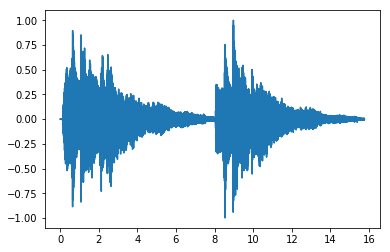

In [9]:
wave.plot()

I selected a segment start at 0 sec to 8 sec.

In [12]:
segment = wave.segment(start=0, duration=8)
segment.make_audio()

Here's what the segment looks like:


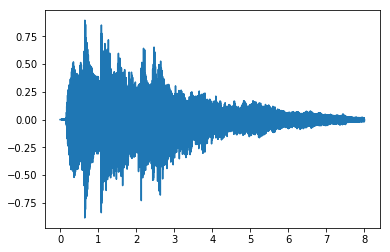

In [13]:
segment.plot()

And here's an even shorter segment so you can see the waveform:

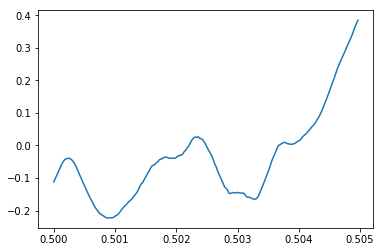

In [14]:
segment.segment(start=0.5, duration=0.005).plot()

Here's what the spectrum looks like:

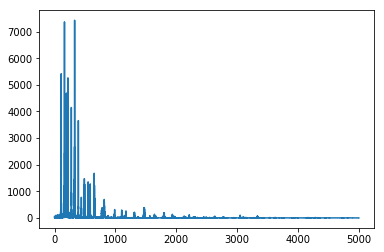

In [17]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)

It has lots of frequency components.  Let's zoom in on the fundamental and dominant frequencies:

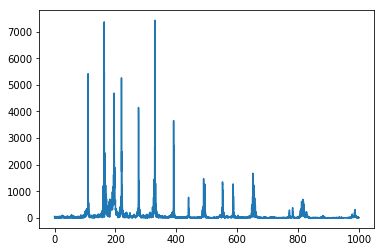

In [23]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

`peaks` prints the highest points in the spectrum and their frequencies, in descending order:

In [20]:
spectrum.peaks()[:30]

[(7426.07666778243, 329.75),
 (7364.304869460793, 163.25),
 (6782.158938948216, 163.125),
 (5987.214988677845, 329.875),
 (5479.05974960813, 163.5),
 (5417.2324092515255, 110.125),
 (5387.904301188182, 110.0),
 (5260.347804020884, 219.875),
 (5191.673381530323, 163.375),
 (4689.310107792643, 195.875),
 (4213.515706824852, 163.625),
 (4148.535306894349, 275.875),
 (4139.104279265231, 163.0),
 (4065.415714603227, 330.125),
 (3883.7191913342085, 276.0),
 (3858.656451589577, 196.0),
 (3656.1324127211274, 391.125),
 (3467.422552700849, 276.25),
 (3431.2244712383786, 276.125),
 (3091.1932881434673, 330.375),
 (3072.894128239897, 109.875),
 (3069.7695674480424, 330.0),
 (2961.2677621864063, 162.625),
 (2959.657207477206, 195.75),
 (2930.337636977774, 162.75),
 (2798.3141042392945, 196.125),
 (2732.6843125655246, 391.0),
 (2717.8608724542623, 391.875),
 (2668.807014123483, 329.0),
 (2665.6390454193224, 391.25)]

filter out the high frequencies:

In [24]:
spectrum.low_pass(200)

And here's what it sounds like: 原本頻率都分布在0 Hz-600 Hz，只讓200Hz以下訊號通過，聲音更低沉、更悶了。

In [25]:
spectrum.make_wave().make_audio()

In [45]:
spectrum.high_pass(200)

In [46]:
spectrum.make_wave().make_audio()

### Exercise 2

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

In [35]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 1000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

### Solution

Here are some arbitrary components I chose.  It makes an interesting waveform!

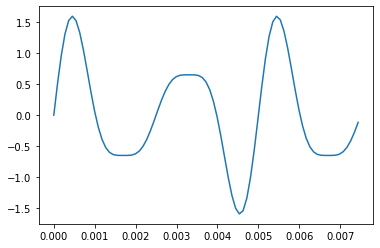

In [15]:
from thinkdsp import SinSignal

signal = (SinSignal(freq=400, amp=1.0) +
          SinSignal(freq=600, amp=0.5) +
          SinSignal(freq=800, amp=0.25))
signal.plot()

We can use the signal to make a wave:

In [16]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

And here's what it sounds like:

In [17]:
wave2.make_audio()

The components are all multiples of 200 Hz, so they make a coherent sounding tone.

Here's what the spectrum looks like:

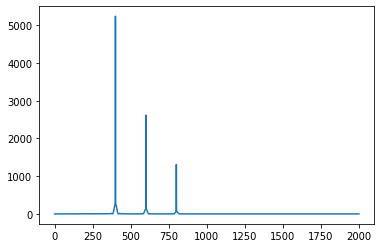

In [18]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)

If we add a component that is not a multiple of 200 Hz, we hear it as a distinct pitch.

In [19]:
signal += SinSignal(freq=450)
signal.make_wave().make_audio()

### Exercise 3

Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.  Hint: it should only take two lines of code.

### Solution

I'll use the trumpet example again:

In [20]:
wave3 = read_wave('170255__dublie__trumpet.wav')
wave3.normalize()
wave3.make_audio()

Here's my implementation of `stretch`

In [21]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

And here's what it sounds like if we speed it up by a factor of 2.

In [22]:
stretch(wave3, 0.5)
wave3.make_audio()

Here's what it looks like (to confirm that the `ts` got updated correctly).

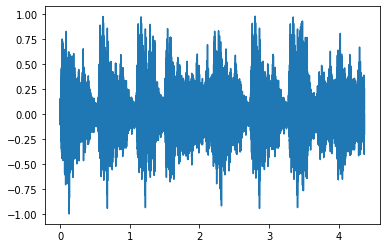

In [23]:
wave3.plot()

I think it sounds better speeded up.  In fact, I wonder if we are playing the original at the right speed.